<a href="https://colab.research.google.com/github/lushilima/Hidrologia/blob/main/Prova_hidrologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Luciana Shigihara Lima

Data: 10 de agosto de 2025.



Questão 7:

In [2]:
# Importa a biblioteca numpy para lidar com arrays e operações matemáticas
import numpy as np

# Dados do Hidrograma Unitário (HU)
# O HU é a vazão (em m³/s) para uma chuva efetiva de 10 mm e duração de 1h
tempo_hu = np.array([0, 1, 2, 3, 4, 5, 6])
vazao_hu_10mm = np.array([0, 45, 70, 50, 25, 10, 0])

vazao_hu_1mm = vazao_hu_10mm / 10.0

chuva_1_mm = 30  # Chuva efetiva 1 de 30 mm
chuva_2_mm = 20  # Chuva efetiva 2 de 20 mm

duracao_chuva = 1  # 1h

# O hidrograma de cada chuva é o HU de 1mm multiplicado pela quantidade de chuva efetiva
hidrograma_chuva_1 = vazao_hu_1mm * chuva_1_mm
hidrograma_chuva_2 = vazao_hu_1mm * chuva_2_mm

hidrograma_chuva_2_deslocado = np.insert(hidrograma_chuva_2, 0, 0)
hidrograma_chuva_1_completo = np.append(hidrograma_chuva_1, 0)
hidrograma_total = hidrograma_chuva_1_completo + hidrograma_chuva_2_deslocado

vazao_maxima = np.max(hidrograma_total)

print("Vazão do HU para 10mm:", vazao_hu_10mm)
print("Vazão do HU para 1mm:", vazao_hu_1mm)
print("-" * 30)
print("Hidrograma da 1ª chuva (30mm):", hidrograma_chuva_1_completo)
print("Hidrograma da 2ª chuva (20mm) deslocado:", hidrograma_chuva_2_deslocado)
print("-" * 30)
print("Hidrograma total (soma):", hidrograma_total)
print(f"\nVazão máxima de escoamento superficial direto: {vazao_maxima} m³/s")


Vazão do HU para 10mm: [ 0 45 70 50 25 10  0]
Vazão do HU para 1mm: [0.  4.5 7.  5.  2.5 1.  0. ]
------------------------------
Hidrograma da 1ª chuva (30mm): [  0. 135. 210. 150.  75.  30.   0.   0.]
Hidrograma da 2ª chuva (20mm) deslocado: [  0.   0.  90. 140. 100.  50.  20.   0.]
------------------------------
Hidrograma total (soma): [  0. 135. 300. 290. 175.  80.  20.   0.]

Vazão máxima de escoamento superficial direto: 300.0 m³/s


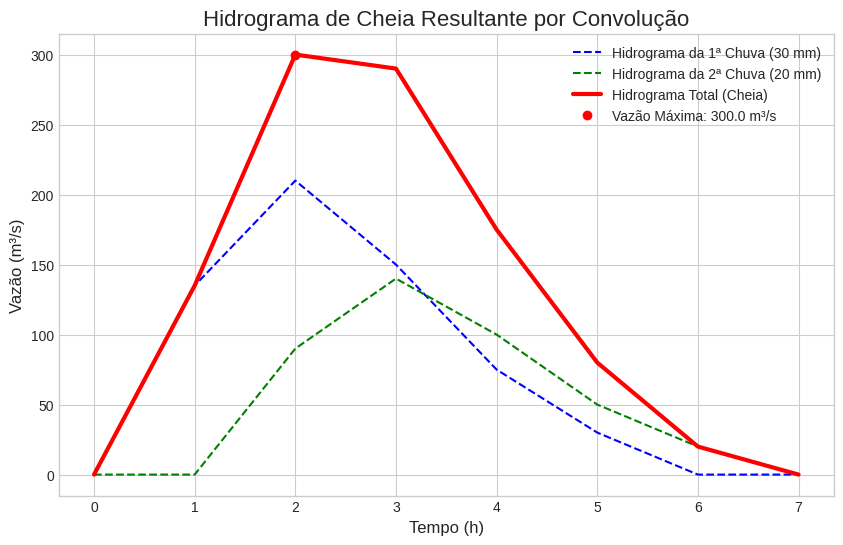

In [4]:
# ----- Plotagem dos gráficos -----
plt.style.use('seaborn-v0_8-whitegrid') # Define um estilo para o gráfico

plt.figure(figsize=(10, 6))

# Plota os hidrogramas individuais
plt.plot(tempo_total, hidrograma_1_completo, '--', label=f'Hidrograma da 1ª Chuva ({chuva_1_mm} mm)', color='blue')
plt.plot(tempo_total, hidrograma_2_deslocado, '--', label=f'Hidrograma da 2ª Chuva ({chuva_2_mm} mm)', color='green')

# Plota o hidrograma total (a soma)
plt.plot(tempo_total, hidrograma_total, '-', label='Hidrograma Total (Cheia)', color='red', linewidth=3)

# Adiciona o ponto de vazão máxima
plt.plot(tempo_maxima, vazao_maxima, 'ro', label=f'Vazão Máxima: {vazao_maxima} m³/s')

# Adiciona títulos e rótulos
plt.title('Hidrograma de Cheia Resultante por Convolução', fontsize=16)
plt.xlabel('Tempo (h)', fontsize=12)
plt.ylabel('Vazão (m³/s)', fontsize=12)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, tamanho_max, 1)) # Garante que os rótulos do eixo X sejam inteiros

# Adiciona grade
plt.grid(True)

# Mostra o gráfico
plt.show()

Questão 10:


In [ ]:
import numpy as np
# Chuvas efetivas (mm)
i = np.array([7.0, 2.0, 1.3, 0.5, 1.4, 2.0, 2.1, 0.5, 0.5, 0.5, 0.5])
# Vazões do escoamento superficial direto (m³/s)
Q_ESD = np.array([0, 249, 3994, 6151, 8386, 11424, 13449, 15014, 16036, 16837, 17403, 17849, 18042, 17592, 17019, 16452, 15644, 14729, 13599, 12274, 10673, 8946, 7228, 5803, 4636, 3541, 2735, 1973, 1448, 1068, 582, 287, 0])

# Duração do evento de chuva
n_chuvas = len(i)
# Duração do hidrograma
n_Q = len(Q_ESD)
# O comprimento do HU é n_Q - n_chuvas + 1
n_HU = n_Q - n_chuvas + 1
HU = np.zeros(n_HU)

# Algoritmo de deconvolução
# A equação para cada ponto de tempo Q_j é:
# Q_j = i_1*HU_j + i_2*HU_{j-1} + ... + i_m*HU_{j-m+1}

# Para j=0, Q_0 = i_0 * HU_0 => 0 = 7.0 * HU_0 => HU_0 = 0
HU[0] = Q_ESD[0] / i[0] if i[0] != 0 else 0

# Loop para calcular cada valor do hidrograma unitário
for j in range(1, n_HU):
    # Calcular a soma dos termos de convolução já conhecidos
    soma_conhecida = 0
    # O loop interno vai de 1 até min(j, n_chuvas - 1)
    for k in range(1, min(j + 1, n_chuvas)):
        soma_conhecida += i[k] * HU[j-k]

    # A equação para o ponto j é: Q_j = i[0]*HU[j] + soma_conhecida
    # Reorganizando: HU[j] = (Q_j - soma_conhecida) / i[0]
    HU[j] = (Q_ESD[j] - soma_conhecida) / i[0]

# Imprimir os resultados
print("Hidrograma Unitário (m³/s por mm):")
print("-" * 40)
for k in range(n_HU):
    tempo = k * 30  # minutos
    print(f"Tempo = {tempo} min:  HU = {HU[k]:.4f} m³/s")

# A área do HU (m³/s * 30 min) deve ser igual ao volume da chuva
# 30 minutos = 30 * 60 = 1800 segundos
# A área do hidrograma unitário é a soma dos valores de vazão multiplicada pelo intervalo de tempo (1800 s)
volume_HU = np.sum(HU) * 1800 # m³
print("-" * 40)
print(f"Volume do HU (m³): {volume_HU:.2f}")

# A área da bacia (A_bacia) em m² seria volume_HU / (1 mm * 1m/1000mm)
# A_bacia = volume_HU / 0.001
# print(f"Área da bacia (km²): {A_bacia / 1e6:.2f}")

Hidrograma Unitário (m³/s por mm):
----------------------------------------
Tempo = 0 min:  HU = 0.0000 m³/s
Tempo = 30 min:  HU = 35.5714 m³/s
Tempo = 60 min:  HU = 560.4082 m³/s
Tempo = 90 min:  HU = 711.9915 m³/s
Tempo = 120 min:  HU = 887.9572 m³/s
Tempo = 150 min:  HU = 1198.9275 m³/s
Tempo = 180 min:  HU = 1240.7272 m³/s
Tempo = 210 min:  HU = 1191.0938 m³/s
Tempo = 240 min:  HU = 1082.8053 m³/s
Tempo = 270 min:  HU = 1036.4313 m³/s
Tempo = 300 min:  HU = 953.3393 m³/s
Tempo = 330 min:  HU = 898.4086 m³/s
Tempo = 360 min:  HU = 900.6202 m³/s
Tempo = 390 min:  HU = 858.3494 m³/s
Tempo = 420 min:  HU = 820.2156 m³/s
Tempo = 450 min:  HU = 792.5245 m³/s
Tempo = 480 min:  HU = 746.8956 m³/s
Tempo = 510 min:  HU = 681.9138 m³/s
Tempo = 540 min:  HU = 589.4501 m³/s
Tempo = 570 min:  HU = 484.0379 m³/s
Tempo = 600 min:  HU = 348.4526 m³/s
Tempo = 630 min:  HU = 210.5074 m³/s
Tempo = 660 min:  HU = 95.5121 m³/s
----------------------------------------
Volume do HU (m³): 29387052.82


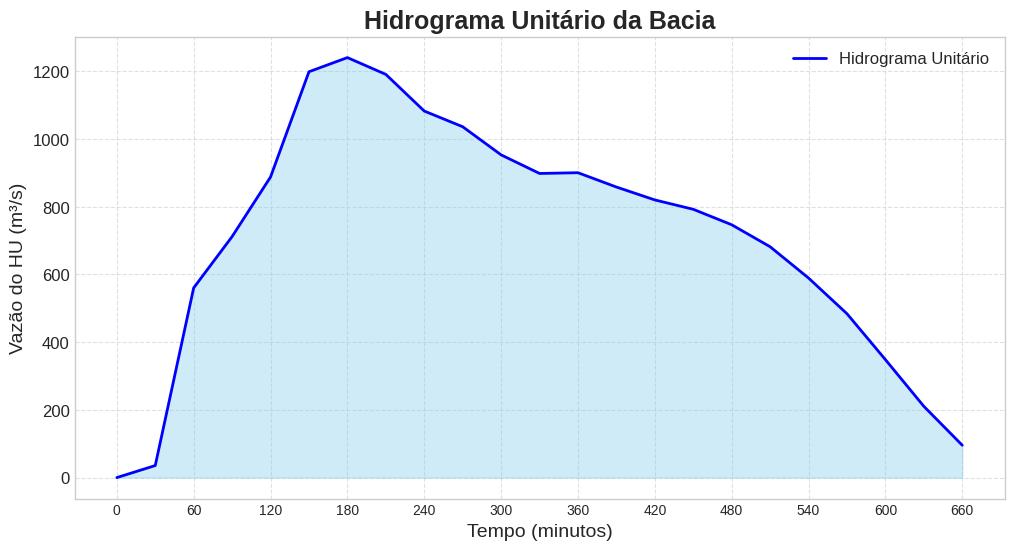

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# O intervalo de tempo é de 30 minutos, e o hidrograma tem 33 pontos
n_HU = len(HU)
tempo = np.arange(n_HU) * 30  # Cria um array de tempo em minutos

# --- Configuração e Criação do Gráfico ---

plt.style.use('seaborn-v0_8-whitegrid') # Estilo do gráfico
plt.figure(figsize=(12, 6)) # Define o tamanho da figura

# Plota o hidrograma unitário
plt.plot(tempo, HU, color='blue', linewidth=2, label='Hidrograma Unitário')
plt.fill_between(tempo, HU, color='skyblue', alpha=0.4)

# Adiciona títulos e rótulos
plt.title('Hidrograma Unitário da Bacia', fontsize=18, fontweight='bold')
plt.xlabel('Tempo (minutos)', fontsize=14)
plt.ylabel('Vazão do HU (m³/s)', fontsize=14)

# Configurações adicionais para melhor visualização
plt.xticks(np.arange(0, tempo[-1] + 1, 60)) # Define os marcadores do eixo x a cada 60 minutos
plt.yticks(fontsize=12) # Ajusta o tamanho da fonte dos rótulos do eixo y
plt.grid(True, linestyle='--', alpha=0.6) # Adiciona uma grade com estilo tracejado
plt.legend(fontsize=12) # Adiciona a legenda

# Exibe o gráfico
plt.show()